In [ ]:
!wget https://cdn.discordapp.com/attachments/788005409604239361/874893684791984179/unknown.png

--2021-08-11 05:55:34--  https://cdn.discordapp.com/attachments/788005409604239361/874893684791984179/unknown.png
Resolving cdn.discordapp.com (cdn.discordapp.com)... 162.159.130.233, 162.159.133.233, 162.159.134.233, ...
Connecting to cdn.discordapp.com (cdn.discordapp.com)|162.159.130.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73456 (72K) [image/png]
Saving to: ‘unknown.png.1’

unknown.png.1       100%[===================>]  71.73K  --.-KB/s    in 0.004s  

2021-08-11 05:55:35 (18.3 MB/s) - ‘unknown.png.1’ saved [73456/73456]



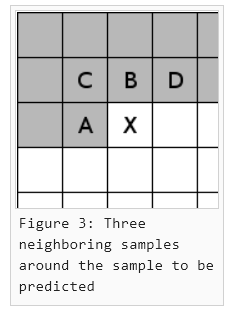

In [ ]:
import cv2
img = cv2.imread("/content/unknown.png")[:,:,0:1]
from google.colab.patches import cv2_imshow
cv2_imshow(img)

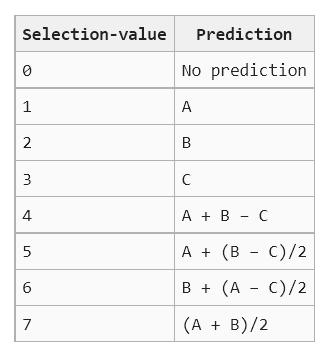

In [ ]:
img = cv2.imread("/content/unknown1.png")[:,:,0:1]
from google.colab.patches import cv2_imshow
cv2_imshow(img)

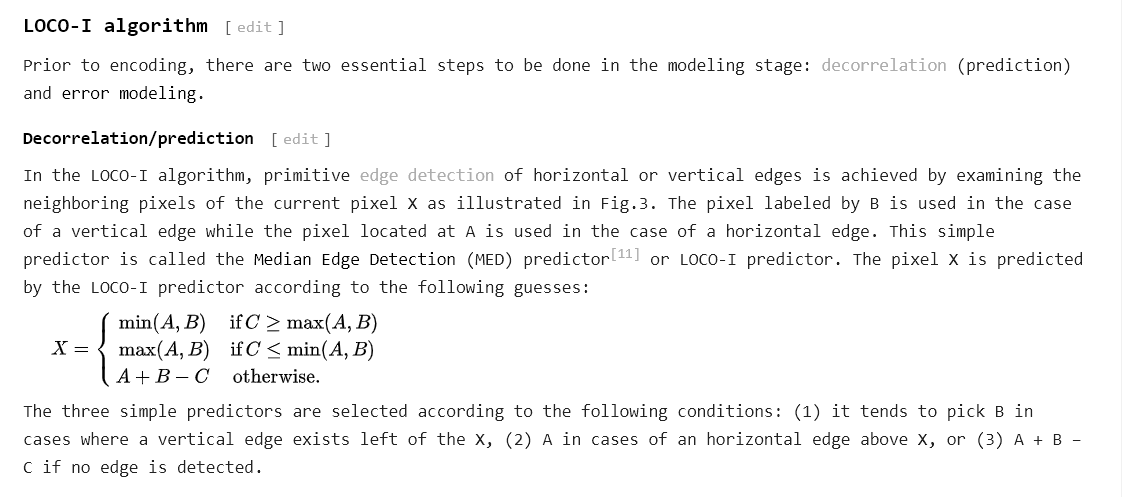

In [ ]:
img = cv2.imread("/content/unknown2.png")[:,:,0:1]
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
-> Lossless JPEG[3] is actually a mode of operation of JPEG
-> Discrete cosine transform (DCT) based
-> Lossless mode of operation
-> Most predictors take the average of the samples immediately above and 
    to the left of the target sample. DPCM encodes the differences 
    between the predicted samples instead of encoding each sample independently

In [ ]:
dc = [-1, -1]
db = [0, -1]
dd = [-1, -1]
da = [-1, 0]
dx = [0, 0]

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png

--2021-08-11 07:11:47--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png.3’

Lenna_(test_image). 100%[===================>] 462.73K  1.86MB/s    in 0.2s    

2021-08-11 07:11:47 (1.86 MB/s) - ‘Lenna_(test_image).png.3’ saved [473831/473831]



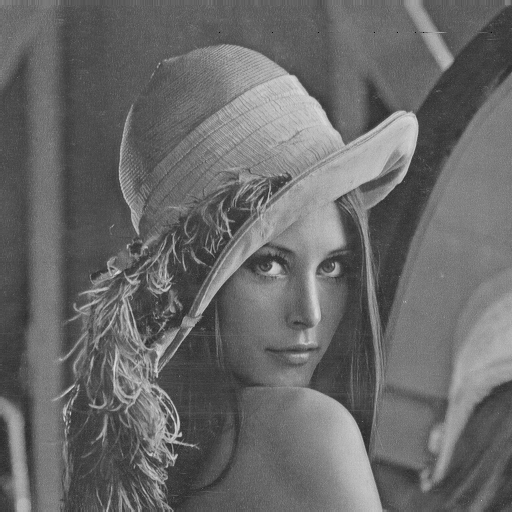

In [ ]:
img = cv2.imread("/content/Lenna_(test_image).png")[:,:,0:1]
cv2_imshow(img)

In [ ]:
# import numpy as np

predicted_image = img

for i in range(1, img.shape[0]):
    for j in range(1, img.shape[1]):
        A = img[i+da[0]][i+da[1]]
        B = img[i+db[0]][i+db[1]]
        C = img[i+dc[0]][i+dc[1]]

        val = 0

        if (C >= max(A, B)):
            val = min(A, B)
        elif (C <= min(A, B)):
            val = max(A, B)
        else:
            val = A+B-C

        predicted_image[i][j][0] = val

In [ ]:
def loco_i(data):
  row, col = data.shape
  C = 50
  P = np.ones((row+1, col+1))
  R = np.ones((row+1, col+1))
  P[0] *= C
  P[1:row+1,1] *= C

  P[1:row+1,1:col+1] = data

  for i in range(1, row+1):
    for j in range(1, col+1):

      A, B, C = P[i,j-1], P[i-1,j], P[i-1,j-1]

      if C <= min(A, B):
        X = max(A, B)

      elif C >= max(A, B):
        X = min(A, B)

      else:
        X = A + B - C

    R[i,j] = X

  R = R[1:row+1,1:col+1]
  R = data - R

  return R

In [ ]:
out = loco_i(img[:, :, 0])